# Save passage images

In [1]:
import sys; sys.path.append('../..')
from abslithist import *
from abslithist.realism.passages import *

In [2]:
oroot=PATH_PSG_IMGS
ifn=PATH_PSG_SCORE_SMPL
if not os.path.exists(oroot): os.makedirs(oroot)

In [3]:
dfsmpl=pd.read_pickle(ifn).reset_index()
dfsmpl

,index,id,author,title,year_meta,canon_genre,canon_name,major_genre,setting_elson,year_trans,...,num_recog_types,ttr_recog,val_mean,val_median,val_stdev,val_mean_z,decision,period,i_smpl,id_smpl
0,770402,chadwyck.Sales.Theophania.0986,"Sales, W., Sir",Theophania (1655),1655,Political rom.,Romance,Romance,,,...,51,1.000000,-0.886747,-1.067957,0.670703,-1.852464,Abstract,C17,0,C17_Abstract_00
1,76639,chadwyck.Borrow.Lavengro_the_Scholarmdash.1141,"Borrow, George Henry, 1803-1881",Lavengro; the Scholar&mdash;the Gypsy&mdash;th...,1851,,,,,,...,51,0.980769,0.572354,0.560048,0.770530,1.596427,Concrete,C19,0,C19_Concrete_00
2,439174,chadwyck.Herbert.The_Princess_Cloria.0978,"Herbert, Percy, Sir",The Princess Cloria (1661),1661,Political rom.,,Romance,,,...,50,0.943396,-0.822593,-0.984343,0.741601,-1.700822,Abstract,C17,1,C17_Abstract_01
3,439327,chadwyck.Herbert.The_Princess_Cloria.0978,"Herbert, Percy, Sir",The Princess Cloria (1661),1661,Political rom.,,Romance,,,...,50,1.000000,-0.785827,-0.817595,0.603994,-1.613918,Abstract,C17,2,C17_Abstract_02
4,554357,chadwyck.Kingsley.Alton_Locke_Tailor_and_Po.1229,"Kingsley, Charles, 1819-1875","Alton Locke, Tailor and Poet. An Autobiography...",1850,,,,mixed,,...,46,0.901961,0.749636,0.751943,0.641128,2.015470,Concrete,C19,1,C19_Concrete_01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,704419,Plato.Dialogues,Plato,Dialogues,-375,Socratic dialogues,,Dialogue,,,...,26,0.509804,-0.904678,-1.059327,0.818589,-1.894847,Abstract,Pre-C17,99,Pre-C17_Abstract_99
996,12985,Ammianus.History,Ammianus,Roman History,391,,,History,,,...,62,0.815789,0.644709,0.602203,0.977490,1.767453,Concrete,Pre-C17,99,Pre-C17_Concrete_99
997,1031812,Unknown.King James Bible.Old Testament,,Old Testament,1611,,,,,,...,38,0.513514,0.845082,1.027863,0.643346,2.241078,Concrete,C17,98,C17_Concrete_98
998,605396,chadwyck.MacDonald.The_Princess_And_The_Gobl.1236,"MacDonald, George, 1824-1905",The Princess And The Goblin: By George Macdona...,1872,,,,,,...,46,0.867925,0.899849,0.985859,0.522610,2.370531,Concrete,C19,99,C19_Concrete_99


In [4]:
md,fig = showpsg_t(dfsmpl.iloc[0].txt, C.textd[dfsmpl.iloc[0].id], show=False, font_size=9)
# fig

In [5]:
def save_psg_img(md,fig,ofn='fig.png',width=444,title='',monospace=False):
    tmpfn='.fig.png'
    fig.save(tmpfn)
    
    dfx=pd.DataFrame([
        {'passage':md,'figure':f'<img src="{tmpfn}" width="{width}" />'},
    ]).T.reset_index().drop('index',1)
    
    dfx.columns = [title] if title else ['Passage concreteness scores']
    
    from ftfy import fix_text
    dfhtml=dfx.to_html(index=False).replace('&gt;','>').replace('&lt;','<').replace('\\n','').replace('  ',' ')    

    extra_css="""
    <style type="text/css">
    td { width: """+str(width)+"""px; line-height:2em; }
    tr,td,th,table { border:0px; }
    th { text-align: center; font-weight:normal; font-size:1.1em; } 
    tr { vertical-align: top; }
    """

    if monospace:
        extra_css+="""
        table { font-size:0.8em; font-family: Menlo,"Courier New",monospace; }
        """
    extra_css+="""
    </style>
    """
    
    html_str = f"""
    <html>
    <head>
    <title>Comparison</title>
    {get_css()}
    {extra_css}
    </head>
    <body>
    {dfhtml}
    </body>
    </html>
    """

    html_str=fix_text(lltk.clean_text(html_str))
    tmphtmfn=os.path.abspath('.fig.htm.html')
    with open(tmphtmfn,'w') as of: of.write(html_str)
    abscmd=os.path.join(PATH_HERE,'')
    cmd=f'{PATH_IMGCONVERT} "{tmphtmfn}" "{ofn}"'
    x=os.system(cmd)
    if PATH_FIGS2: os.system(f'cp {ofn} {PATH_FIGS2}')
    return os.path.abspath(ofn)

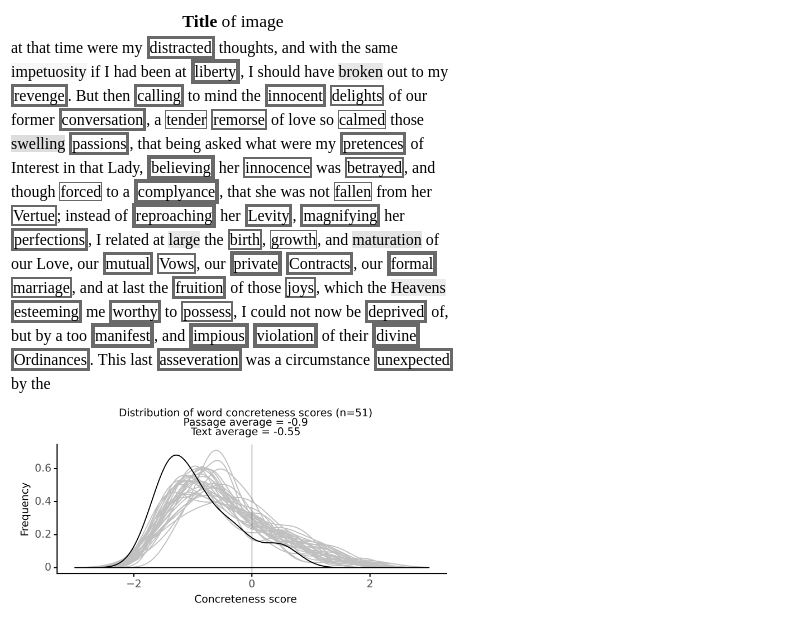

In [6]:
printimg(save_psg_img(md,fig,title='<b>Title</b> of image'))

In [7]:
def save_psg_row_img(row):
    ofn=os.path.join(oroot,row.id_smpl+'.png')
    if os.path.exists(ofn): return ofn
    
    t=C.textd[row.id]
    title=f'from <i>{t.title}</i>, by {t.author} ({t.year})'
    md,fig = showpsg_t(row.txt, t, show=False, font_size=9)
    imgfn = save_psg_img(md,fig,ofn=ofn, title=title, width=500)
    return imgfn

In [8]:
# printimg(save_psg_row_img(dfsmpl.iloc[0]))

In [9]:
rows=[row for i,row in dfsmpl.sample(frac=1).iterrows()]
res=pmap(save_psg_row_img,rows,num_proc=1)

Mapping save_psg_row_img() [x1]: 100%|██████████| 1000/1000 [04:05<00:00,  4.08it/s]
